In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from util import *
from pandas.plotting import autocorrelation_plot
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [3]:
raw_data = pd.read_csv("raw_data_new.csv", parse_dates=[0], index_col=0)

In [4]:
raw_data['pm25']

2014-01-01 08:00:00     51.0
2014-01-01 14:00:00     23.0
2014-01-01 20:00:00     66.0
2014-01-02 02:00:00    127.0
2014-01-02 08:00:00    119.0
2014-01-02 14:00:00    108.0
2014-01-02 20:00:00    168.0
2014-01-03 02:00:00    122.0
2014-01-03 08:00:00     30.0
2014-01-03 14:00:00     16.0
2014-01-03 20:00:00     57.0
2014-01-04 02:00:00     76.0
2014-01-04 08:00:00     78.0
2014-01-04 14:00:00    170.0
2014-01-04 20:00:00    206.0
2014-01-05 02:00:00    151.0
2014-01-05 08:00:00     90.0
2014-01-05 14:00:00     29.0
2014-01-05 20:00:00     45.0
2014-01-06 02:00:00    143.0
2014-01-06 08:00:00    107.0
2014-01-06 14:00:00    138.0
2014-01-06 20:00:00    162.0
2014-01-07 02:00:00    184.0
2014-01-07 08:00:00    181.0
2014-01-07 14:00:00     44.0
2014-01-07 20:00:00     37.0
2014-01-08 02:00:00     15.0
2014-01-08 08:00:00     19.0
2014-01-08 14:00:00     19.0
                       ...  
2017-12-24 08:00:00     15.0
2017-12-24 14:00:00      8.0
2017-12-24 20:00:00      6.0
2017-12-25 02:

(0, 20)

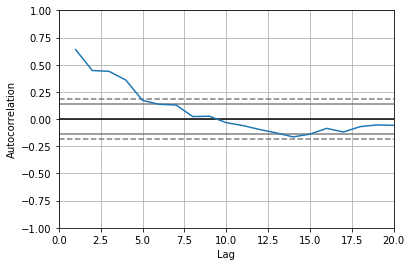

In [15]:
ax = autocorrelation_plot(raw_data['pm25'][:200])
ax.set_xlim(0, 20)

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


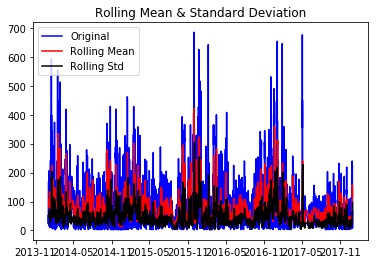

Results of Dickey-Fuller Test:
Test Statistic                -1.061461e+01
p-value                        5.717288e-19
#Lags Used                     3.000000e+01
Number of Observations Used    5.457000e+03
Critical Value (1%)           -3.431549e+00
Critical Value (5%)           -2.862070e+00
Critical Value (10%)          -2.567052e+00
dtype: float64


In [8]:
test_stationarity(raw_data['pm25'])

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import math

In [36]:
# Setting parameters
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 10
predict_hours = 3
n_features = 21

In [37]:
reframed = series_to_supervised(raw_data, lag_hours, predict_hours)

In [52]:
# Turn off shuffle, because it's a sequense model!!!
y = raw_data['pm25'][:-lag_hours - predict_hours + 1].values
train_size = int(len(y)*0.8)
train_y = y[:train_size]
test_y = y[train_size:]
print(train_y.shape)
print(test_y.shape)

(4380,)
(1096,)


In [67]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    print(history[-10:])
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print('Test MSE: %.3f' % error)
# plot

TypeError: must be str, not list

In [113]:
y_predict = np.zeros((len(test_y) + 2, predict_hours))
for t in range(len(test_y)):
    train_data = y[: len(train_y) + t]
#     print(train_data)
    model = ARIMA(train_data, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_predict[t, 0] = output[0]
    
    for j in range(1, predict_hours):
        train_data = np.concatenate((train_data, np.array([y_predict[t+j-1, j-1]])))
        model = ARIMA(train_data, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        y_predict[t+j, j] = output[0]
    
    if (t+1) % 10 == 0:
        print(t+1)

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090


In [27]:
print("mae:")
print(mean_absolute_error(predictions, test))
print("rmse:")
print(math.sqrt(mean_squared_error(predictions, test)))

mae:
21.882084837499196
rmse:
38.45588359388452


In [110]:
y_predict[:, 2]

array([ 0.        ,  0.        , 62.39809232, ...,  0.        ,
        0.        ,  0.        ])

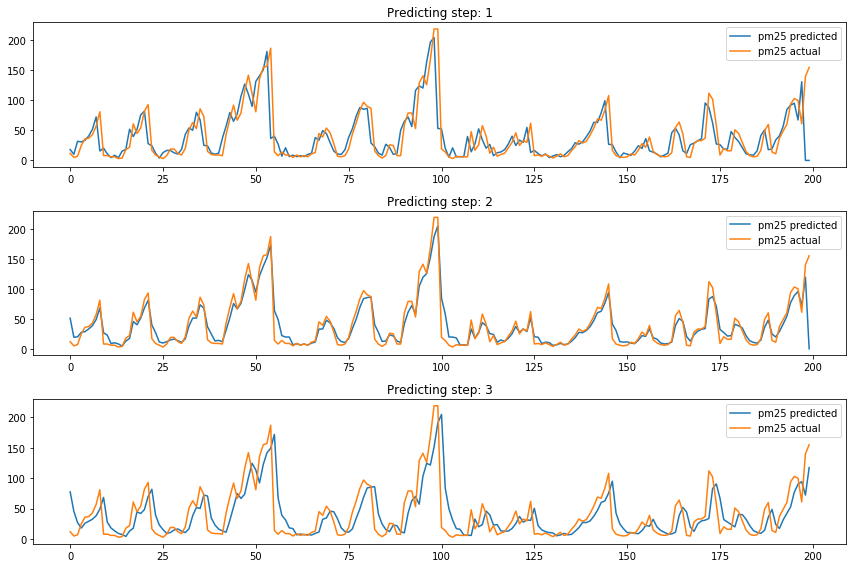

In [129]:
# plt.plot(y_predict[-200:, 2], '-', label = 'pm25 predicted')
# plt.plot(test_y[-200:], '-', label = 'pm25 actual')

# Plot for ARIMA
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(y_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(test_y[-200:], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predicting step: '+ str(i+1))
plt.tight_layout()
plt.savefig("LSTM.png")

In [130]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(y_predict[2:1096, i], test_y[2:1096]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(y_predict[2:1096, i], test_y[2:1096])))
    print("mape:")
    print(mean_absolute_percentage_error(y_predict[2:1096, i], test_y[2:1096]))

predict_hours 0
mae:
21.72581704179095
rmse:
38.037936174574575
mape:
0.4955052469305565
predict_hours 1
mae:
29.854452285855405
rmse:
47.53715139465196
mape:
0.6705544319673415
predict_hours 2
mae:
34.80485370979696
rmse:
54.213784417062485
mape:
0.8061046795009271


In [19]:
len(test)

1098

In [59]:
np.array([1,2,3])

array([1, 2, 3])

In [69]:
history

[array([ 5.10000000e+01,  2.70487368e+02,  2.58980250e+02,  2.50767954e+00,
        -6.58156083e-01,  9.79977290e+04,  2.48554676e+02,  2.70020533e+02,
         2.76617789e+02,  1.30782522e-04,  1.30169977e-03,  1.26522611e-03,
         2.30464108e+01,  1.05486110e+01,  3.18015608e+00, -2.02409684e+01,
        -9.27481933e+00, -8.19753749e-01, -3.62158766e-01,  2.70264975e-01,
         2.57394017e-01,  2.30000000e+01,  2.83838611e+02,  2.58241520e+02,
         3.15403697e+00, -5.09842889e-02,  9.80488818e+04,  2.49264215e+02,
         2.70571515e+02,  2.82831868e+02,  1.93577377e-04,  1.50963722e-03,
         1.55663936e-03,  2.31753714e+01,  8.06042995e+00,  3.08153915e+00,
        -1.60765331e+01, -5.24643804e+00,  1.87834523e-01, -2.13866937e-01,
         3.26161710e-01,  1.70515047e-01,  6.60000000e+01,  2.73009328e+02,
         2.61723400e+02,  1.84221795e+00, -1.24845331e+00,  9.83546161e+04,
         2.48722481e+02,  2.71406578e+02,  2.82505506e+02,  1.95457463e-04,
         1.6

In [81]:
y_predict.plot

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [119]:
test_y.shape

(1096,)

In [120]:
test_y

array([  6.,   8.,  20., ...,  61., 140., 155.])

In [122]:
y_predict[:,1]

array([  0.        ,  62.37985733,  39.86387338, ...,  71.98526444,
       119.32348571,   0.        ])

In [127]:

def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 1